In [ ]:
# beberapa library yang digunakan
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(['science', 'notebook'])
plt.style.available
from scipy.ndimage import convolve, generate_binary_structure # library yang digunakan untuk pemrosesan gambar

In [ ]:
N = 100
grid = np.zeros((N,N,N))+0.5 # mengatur grid di semua titik potensial sama dengan 0.5

In [ ]:
grid[30:70,30:70,20] = 1 # lokasi grid
grid[30:70,30:70,80] = 0 # lokasi grid
mask_pos = grid==1 # untuk positif
mask_neg = grid==0 # untuk negatif

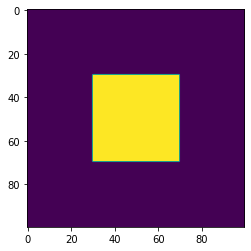

In [ ]:
plt.imshow(mask_pos[:,:,20])

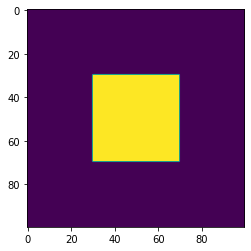

In [ ]:
plt.imshow(mask_neg[:,:,80])

In [ ]:
yv, xv, zv = np.meshgrid(np.arange(N),np.arange(N),np.arange(N)) # memberitahukan nilai x, y, z 
#grid = 1-zv/100 (tebakan awal untuk grid)

In [ ]:
kern = generate_binary_structure(3,1).astype(float)/6 # untuk menghasilkan struktur biner
kern[1,1,1] = 0
kern

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.16666667, 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.16666667, 0.        ],
        [0.16666667, 0.        , 0.16666667],
        [0.        , 0.16666667, 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.16666667, 0.        ],
        [0.        , 0.        , 0.        ]]])

In [ ]:
def neumann(a):
    a[0,:,:] = a[1,:,:]; a[-1,:,:] = a[-2,:,:]
    a[:,0,:] = a[:,1,:]; a[:,-1,:] = a[:,-2,:]
    a[:,:,0] = a[:,:,1]; a[:,:,-1] = a[:,:,-2]
    return a

In [ ]:
# untuk error
err = []
iters = 2000
for i in range(iters):
    grid_updated = convolve(grid,kern, mode='constant') # mendapatkan grid baru, menggabungkan grid
    # Boundary conditions (neumann)
    grid_updated = neumann(grid_updated)
    # Boundary conditions (dirchlett)
    grid_updated[mask_pos] = 1
    grid_updated[mask_neg] = 0
    # See what error is between consecutive arrays
    err.append(np.mean((grid-grid_updated)**2))
    grid = grid_updated

In [ ]:
slc = 40

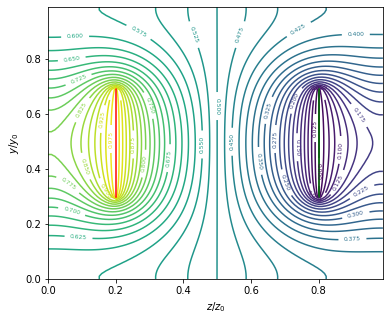

In [ ]:
# untuk memplot grafik
plt.figure(figsize=(6,5))
CS = plt.contour(np.arange(100)/100, np.arange(100)/100, grid[slc], levels=40)
plt.clabel(CS, CS.levels, inline=True, fontsize=6)
plt.xlabel('$z/z_0$')
plt.ylabel('$y/y_0$')
plt.axvline(0.2, ymin=0.3, ymax=0.7, color='r')
plt.axvline(0.8, ymin=0.3, ymax=0.7, color='g')
plt.show()

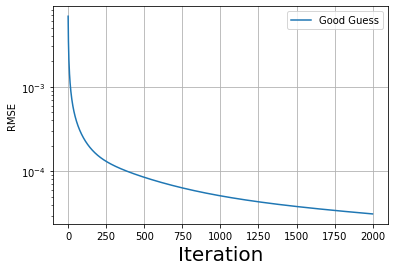

In [ ]:
# untuk memplot grafik
plt.semilogy(np.sqrt(np.array(err)), label='Good Guess')
plt.legend()
plt.xlabel('Iteration', fontsize=20)
plt.ylabel(r'RMSE')
plt.grid()